## NLP 

Teilnehmer*innen clustern anhand der Textfelder.

Fav_Sportart, Fav_Essen in Tfidf-Vetoren umwandeln und mit KMeans mögliche Cluster herausfinden.

Fav_Musik, mithilfe von Spotify-API Genre herausfinden und anhand der Genres clustern.

In [11]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb  # data visualization library  
import matplotlib.pyplot as plt  # data visualization library 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [12]:
filename = "./data/survery_data_annonymized_230626_clean.csv"

data = pd.read_csv(filename)

In [13]:
#to_drop = ["Unnamed: 0"]#Wird nicht benötigt
#data = data.drop(to_drop, axis=1)
data["Fav_Sportart"]

0         Joggen/Laufen
1               Fußball
2          Keine Angabe
3             Trampolin
4     Bouldern/Klettern
            ...        
57         Keine Angabe
58              Fußball
59               Rudern
60         Padel-Tennis
61           Ski fahren
Name: Fav_Sportart, Length: 62, dtype: object

## Fav_Sportart

In [14]:
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2))

#NaN-Werte mit kein favorit überschreiben
sportarten = data["Fav_Sportart"].fillna('kein favorit')

tfidf_sportarten = vectorizer.fit_transform(sportarten)
print(tfidf_sportarten)

  (0, 16)	0.5773502691896257
  (0, 23)	0.5773502691896257
  (0, 15)	0.5773502691896257
  (1, 12)	1.0
  (2, 20)	0.5773502691896257
  (2, 0)	0.5773502691896257
  (2, 19)	0.5773502691896257
  (3, 40)	1.0
  (4, 5)	0.5773502691896257
  (4, 21)	0.5773502691896257
  (4, 4)	0.5773502691896257
  (5, 5)	0.5773502691896257
  (5, 21)	0.5773502691896257
  (5, 4)	0.5773502691896257
  (6, 20)	0.5773502691896257
  (6, 0)	0.5773502691896257
  (6, 19)	0.5773502691896257
  (7, 12)	1.0
  (8, 29)	1.0
  (9, 37)	1.0
  (10, 20)	0.5773502691896257
  (10, 0)	0.5773502691896257
  (10, 19)	0.5773502691896257
  (11, 17)	1.0
  (12, 11)	1.0
  :	:
  (47, 12)	1.0
  (48, 12)	1.0
  (49, 5)	0.5773502691896257
  (49, 21)	0.5773502691896257
  (49, 4)	0.5773502691896257
  (50, 42)	1.0
  (51, 1)	1.0
  (52, 14)	1.0
  (53, 2)	1.0
  (54, 12)	1.0
  (55, 41)	1.0
  (56, 16)	0.5773502691896257
  (56, 23)	0.5773502691896257
  (56, 15)	0.5773502691896257
  (57, 20)	0.5773502691896257
  (57, 0)	0.5773502691896257
  (57, 19)	0.57735026

In [15]:
kmeans = KMeans(n_clusters=16,random_state=0).fit(tfidf_sportarten) #ausprobieren, wie viele Cluster sinn ergeben

/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2c5c5cf010>
Traceback (most recent call last):
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version =

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2c109e1ab0>
Traceback (most recent call last):
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling

In [16]:
label_sportarten = kmeans.predict(tfidf_sportarten) #mögliche Labels vorhersagen für die einzelnen Sportarten
label_sportarten

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2c5c5ce170>
Traceback (most recent call last):
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


array([10,  4,  5,  0,  6,  6,  5,  4,  0,  8,  5,  0,  0,  0,  3,  3,  7,
        2,  2,  1,  4,  9,  4,  1,  0,  0,  2,  4,  0, 12,  2,  0,  5, 15,
        6, 14,  0,  0, 11, 13,  6,  0, 15, 12,  0,  7,  4,  4,  4,  6,  0,
       15,  0,  1,  4, 11, 10,  5,  4,  0,  8, 14], dtype=int32)

In [17]:
#Cluster erstellen, jeweiligen Sportarten zu den Clustern zuordnen
cluster = {}
n = 0
for item in label_sportarten:
    try:
        if item in cluster:
            cluster[item].append(sportarten[n])
        else:
            cluster[item] = [sportarten[n]]
        n +=1
    except KeyError:
        continue  

In [18]:
for item in cluster:
    print ("Cluster ", item)
    for i in cluster[item]:
        print(i)

Cluster  10
Joggen/Laufen
Joggen/Laufen
Cluster  4
Fußball
Fußball
Fußball
Fußball
Fußball
Fußball
Fußball
Fußball
Fußball
Fußball
Cluster  5
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Cluster  0
Trampolin
Schnorcheln
Kampfsport
Football
Thaiboxen
Radfahren
Fitness
E-Sport 
Karate
Tanzen
Kraftsport 
Hockey
Squash
Yoga
Inlineskaten
Rudern
Cluster  6
Bouldern/Klettern
Bouldern/Klettern
Bouldern/Klettern
Bouldern/Klettern
Bouldern/Klettern
Cluster  8
Tennis
Padel-Tennis
Cluster  3
Calisthenics
Calisthenics
Cluster  7
Tauchen
Tauchen
Cluster  2
Tischtennis
Tischtennis
Tischtennis
Tischtennis
Cluster  1
Basketball
Basketball
Basketball
Cluster  9
Schwimmen
Cluster  12
Reiten
Reiten
Cluster  15
Badminton
Badminton
Badminton
Cluster  14
Fahrrad fahren
Ski fahren
Cluster  11
Volleyball
Volleyball
Cluster  13
Bogenschießen


In [19]:
#!pip install wordcloud matplotlib

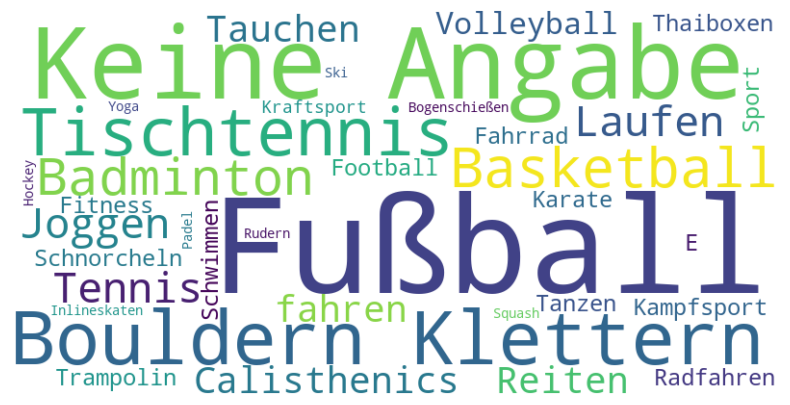

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#kein favorit für die Darstellung herausnehmen
sportarten = sportarten.str.replace('kein favorit','')
concatenated_text = ' '.join(sportarten)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(concatenated_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Fav_Essen

In [21]:
essen = data["Fav_Essen"].fillna('kein favorit')

tfidf_essen = vectorizer.fit_transform(essen)
print(tfidf_essen)

  (0, 71)	0.6464055157972943
  (0, 34)	0.4868210145366179
  (0, 70)	0.5875076245908404
  (1, 9)	1.0
  (2, 34)	1.0
  (3, 7)	1.0
  (4, 15)	1.0
  (5, 50)	1.0
  (6, 68)	1.0
  (7, 48)	1.0
  (8, 54)	1.0
  (9, 67)	1.0
  (10, 31)	0.5773502691896257
  (10, 14)	0.5773502691896257
  (10, 30)	0.5773502691896257
  (11, 16)	1.0
  (12, 2)	0.6165583003438021
  (12, 44)	0.48960364025844816
  (12, 1)	0.6165583003438021
  (13, 25)	1.0
  (14, 13)	1.0
  (15, 7)	1.0
  (16, 49)	1.0
  (17, 7)	1.0
  (18, 61)	1.0
  :	:
  (56, 17)	0.4382995074088213
  (56, 35)	0.33200834817638997
  (57, 55)	1.0
  (58, 29)	0.5773502691896258
  (58, 0)	0.5773502691896258
  (58, 28)	0.5773502691896258
  (59, 27)	0.35126499304916736
  (59, 53)	0.35126499304916736
  (59, 39)	0.35126499304916736
  (59, 45)	0.35126499304916736
  (59, 62)	0.35126499304916736
  (59, 26)	0.35126499304916736
  (59, 52)	0.35126499304916736
  (59, 35)	0.2418362195733803
  (59, 44)	0.2789365080258134
  (60, 5)	0.3877209807102758
  (60, 51)	0.3877209807102758


In [22]:
kmeans = KMeans(n_clusters=15,random_state=0).fit(tfidf_essen)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2c7c2c97e0>
Traceback (most recent call last):
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling

In [23]:
label_essen = kmeans.predict(tfidf_essen) #mögliche Labels vorhersagen
label_essen

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2c091d43a0>
Traceback (most recent call last):
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


array([ 2,  9,  2,  8, 14, 11, 13,  4,  1,  5, 14,  0,  3, 14, 14,  8, 10,
        8, 14,  8,  1,  8,  1, 14,  6,  0, 14,  1, 14,  4,  1,  2,  0,  3,
        2,  7, 10,  0,  5, 14,  6,  2, 14, 14,  5, 10,  3, 14,  7,  1, 14,
       14,  4, 14,  7, 12,  7, 14,  6,  3, 11,  6], dtype=int32)

In [24]:
cluster_essen = {}
n = 0
for item in label_essen:
    try:
        if item in cluster_essen:
            cluster_essen[item].append(essen[n])
        else:
            cluster_essen[item] = [essen[n]]
        n +=1
    except KeyError:
        continue  

In [25]:
for item in cluster_essen:
    print ("Cluster ", item)
    for i in cluster_essen[item]:
        print(i)

Cluster  2
Vegane Lasagne
Lasagne
Lasagne
Lasagne
Lasagne
Cluster  9
Butterbrot
Cluster  8
Burger
Burger
Burger
Burger
Burger
Cluster  14
Dampfnudeln
Koreanisches Dakgangjeong
Hühnchen
Curry
Risotto
Reis mit Sojasoße Hähnchen
Burrito
Shakshuka
Gemüsepfanne mit Reis
Hamburger
Tortellini
Yaprak
Ramen
Humus
Cordon bleu
Pommes 
Cluster  11
Pho
Vegane Pho Bo Suppe
Cluster  13
Tomaten
Cluster  4
Pasta
Pasta
Pasta
Cluster  1
Pizza
Pizza
Pizza
Pizza
Pizza
Pizza
Cluster  5
Sushi
Sushi
Sushi
Cluster  0
Döner
Döner
Döner
Döner
Cluster  3
Asiatische Nudeln
Nudeln
Nudeln
Nudeln mit Pilzen in Sahnesauce
Cluster  10
Pfannkuchen
Pfannkuchen
Pfannkuchen
Cluster  6
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Cluster  7
Gurke mit Mozzarella 
Lachs mit Bratkartoffeln 
Reispfanne mit viel Gemüse
Ofenkartoffeln mit Gemüse
Cluster  12
Carbonara


## Musik

In [26]:
 mask_musik = data["Fav_Musik"]

In [27]:
import requests
import json

client_id = '41a0688d3752459bac10ddb127765ea2'
client_secret = '7fedd9c245e14936873e7ccb5df7ec89'

auth_url = 'https://accounts.spotify.com/api/token'

auth_data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
}

auth_response = requests.post(auth_url, data=auth_data)

access_token = auth_response.json().get('access_token')


headers = {
     'Accept': 'application/json',
     'Content-Type': 'application/json',
     'Authorization': 'Bearer {}'.format(access_token)}


#Später hier dann data["Fav_Musik"] benutzen
for artist in mask_musik: 

    url = f"https://api.spotify.com/v1/search?type=artist&q={artist}" #nach den Artisten mit dem Namen suchen
    response = requests.get( url, headers=headers)                   
    json_data = json.loads(response.text)

    items = json_data["artists"]["items"]

    for item in items:
        if(item["name"].lower() == artist):
            if(item["genres"] != []):
                data.loc[data["Fav_Musik"] == artist, "Musik_Genre"] = item["genres"][0]#Mehrere hinterlegt, erste sollte ausreichen

In [28]:
data["Musik_Genre"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
57    NaN
58    NaN
59    NaN
60    NaN
61    NaN
Name: Musik_Genre, Length: 62, dtype: object

In [29]:
musik_genre = data["Musik_Genre"].fillna('kein favorit')

In [30]:
tfidf_musik = vectorizer.fit_transform(musik_genre)
print(tfidf_musik)

  (0, 9)	0.5773502691896257
  (0, 4)	0.5773502691896257
  (0, 8)	0.5773502691896257
  (1, 9)	0.5773502691896257
  (1, 4)	0.5773502691896257
  (1, 8)	0.5773502691896257
  (2, 9)	0.5773502691896257
  (2, 4)	0.5773502691896257
  (2, 8)	0.5773502691896257
  (3, 9)	0.5773502691896257
  (3, 4)	0.5773502691896257
  (3, 8)	0.5773502691896257
  (4, 9)	0.5773502691896257
  (4, 4)	0.5773502691896257
  (4, 8)	0.5773502691896257
  (5, 9)	0.5773502691896257
  (5, 4)	0.5773502691896257
  (5, 8)	0.5773502691896257
  (6, 9)	0.5773502691896257
  (6, 4)	0.5773502691896257
  (6, 8)	0.5773502691896257
  (7, 9)	0.5773502691896257
  (7, 4)	0.5773502691896257
  (7, 8)	0.5773502691896257
  (8, 9)	0.5773502691896257
  :	:
  (53, 8)	0.5773502691896257
  (54, 9)	0.5773502691896257
  (54, 4)	0.5773502691896257
  (54, 8)	0.5773502691896257
  (55, 9)	0.5773502691896257
  (55, 4)	0.5773502691896257
  (55, 8)	0.5773502691896257
  (56, 9)	0.5773502691896257
  (56, 4)	0.5773502691896257
  (56, 8)	0.5773502691896257
  (5

In [31]:
kmeans = KMeans(n_clusters=7,random_state=0).fit(tfidf_musik)

/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2c091d4820>
Traceback (most recent call last):
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version =

In [32]:
label_musik = kmeans.predict(tfidf_musik) #mögliche Labels vorhersagen
label_musik

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2c016c36d0>
Traceback (most recent call last):
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [33]:
cluster_genre = {}
n = 0
for item in label_musik:
    try:
        if item in cluster_genre:
            cluster_genre[item].append(musik_genre[n])
        else:
            cluster_genre[item] = [musik_genre[n]]
        n +=1
    except KeyError:
        continue  

In [34]:
for item in cluster_genre:
    print ("Cluster ", item)
    for i in cluster_genre[item]:
        print(i)

Cluster  3
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
kein favorit
Cluster  2
detroit hip hop
Cluster  0
atl hip hop


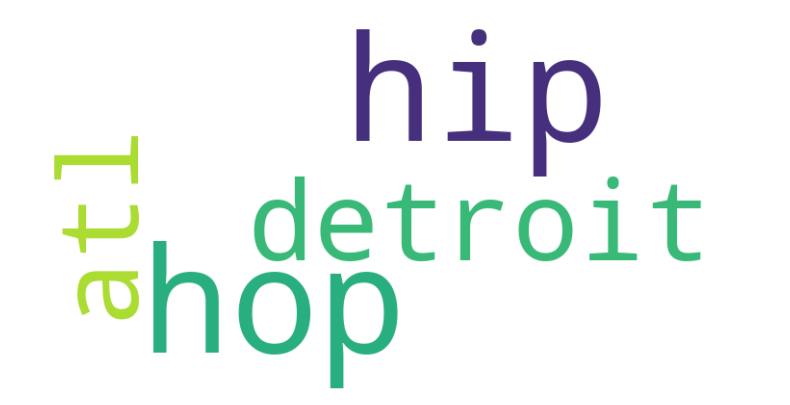

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#kein favorit für die Darstellung herausnehmen
musik_genre = musik_genre.str.replace('kein favorit','')
concatenated_text = ' '.join(musik_genre)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(concatenated_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()